**How many properties are worth $1,000,000 or more?**

---



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from string import ascii_letters

In [22]:
from google.colab import files
uploaded = files.upload()

Saving HW3_Housing Survey.csv to HW3_Housing Survey.csv


In [24]:
df = pd.read_csv('HW3_Housing Survey.csv')
df.head()


,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJUST,WGTP,NP,TYPE,ACR,AGS,BDS,BLD,BUS,CONP,ELEP,FS,FULP,GASP,HFL,INSP,KIT,MHP,MRGI,MRGP,MRGT,MRGX,PLM,RMS,RNTM,RNTP,SMP,TEL,TEN,VACS,VAL,VEH,WATP,YBL,...,wgtp41,wgtp42,wgtp43,wgtp44,wgtp45,wgtp46,wgtp47,wgtp48,wgtp49,wgtp50,wgtp51,wgtp52,wgtp53,wgtp54,wgtp55,wgtp56,wgtp57,wgtp58,wgtp59,wgtp60,wgtp61,wgtp62,wgtp63,wgtp64,wgtp65,wgtp66,wgtp67,wgtp68,wgtp69,wgtp70,wgtp71,wgtp72,wgtp73,wgtp74,wgtp75,wgtp76,wgtp77,wgtp78,wgtp79,wgtp80
0,H,186,8,700,4,16,1015675,89,4,1,1.0,NaN,4.0,2.0,2.0,NaN,180.0,0.0,2.0,3.0,3.0,600.0,1.0,NaN,1.0,1300.0,1.0,1.0,1.0,9.0,NaN,NaN,NaN,1.0,1.0,NaN,17.0,3.0,840.0,5.0,...,90,171,27,83,153,148,92,91,91,93,90,26,94,142,24,91,29,84,148,30,93,143,24,88,147,145,91,83,83,86,81,27,93,151,28,79,25,101,157,129
1,H,306,8,700,4,16,1015675,310,1,1,NaN,NaN,1.0,7.0,NaN,NaN,60.0,0.0,2.0,3.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,600.0,NaN,1.0,3.0,NaN,NaN,1.0,1.0,3.0,...,107,253,321,289,96,343,564,274,118,118,321,261,130,463,294,479,391,307,476,283,116,353,323,374,106,236,380,313,90,94,292,401,81,494,346,496,615,286,454,260
2,H,395,8,100,4,16,1015675,106,2,1,1.0,NaN,3.0,2.0,2.0,NaN,70.0,0.0,2.0,30.0,1.0,200.0,1.0,NaN,NaN,NaN,NaN,3.0,1.0,7.0,NaN,NaN,NaN,1.0,2.0,NaN,18.0,2.0,50.0,5.0,...,173,36,168,175,99,103,30,35,155,102,95,107,185,120,114,113,36,115,103,29,183,35,179,169,95,110,28,34,233,97,123,119,168,107,95,101,30,124,106,31
3,H,506,8,700,4,16,1015675,240,4,1,1.0,NaN,4.0,2.0,2.0,NaN,40.0,0.0,2.0,80.0,1.0,200.0,1.0,NaN,1.0,860.0,1.0,1.0,1.0,6.0,NaN,NaN,400.0,1.0,1.0,NaN,19.0,3.0,500.0,2.0,...,239,65,259,247,230,225,82,220,233,419,390,69,74,391,276,70,422,409,223,245,269,488,221,250,247,240,415,234,219,66,68,359,385,71,234,421,76,77,242,231
4,H,835,8,800,4,16,1015675,118,4,1,2.0,1.0,5.0,2.0,2.0,NaN,250.0,0.0,2.0,3.0,3.0,700.0,1.0,NaN,1.0,1900.0,1.0,1.0,1.0,7.0,NaN,NaN,650.0,1.0,1.0,NaN,20.0,5.0,2.0,3.0,...,116,36,135,237,33,33,249,102,84,224,119,250,119,125,126,32,112,33,131,45,101,165,125,41,191,195,49,119,92,44,127,36,119,121,116,209,97,176,144,38


In [0]:
df.describe()

,SERIALNO,DIVISION,PUMA,REGION,ST,ADJUST,WGTP,NP,TYPE,ACR,AGS,BDS,BLD,BUS,CONP,ELEP,FS,FULP,GASP,HFL,INSP,KIT,MHP,MRGI,MRGP,MRGT,MRGX,PLM,RMS,RNTM,RNTP,SMP,TEL,TEN,VACS,VAL,VEH,WATP,YBL,FES,...,wgtp41,wgtp42,wgtp43,wgtp44,wgtp45,wgtp46,wgtp47,wgtp48,wgtp49,wgtp50,wgtp51,wgtp52,wgtp53,wgtp54,wgtp55,wgtp56,wgtp57,wgtp58,wgtp59,wgtp60,wgtp61,wgtp62,wgtp63,wgtp64,wgtp65,wgtp66,wgtp67,wgtp68,wgtp69,wgtp70,wgtp71,wgtp72,wgtp73,wgtp74,wgtp75,wgtp76,wgtp77,wgtp78,wgtp79,wgtp80
count,6.496000e+03,6496.0,6496.000000,6496.0,6496.0,6496.0,6496.000000,6496.000000,6496.000000,5501.000000,1422.000000,6157.000000,6157.000000,5501.000000,60.000000,5637.000000,5976.000000,5637.000000,5637.000000,5637.000000,4358.000000,6157.000000,432.000000,2945.000000,2945.000000,2945.000000,4358.000000,6157.000000,6157.000000,1203.000000,1203.000000,782.000000,5637.000000,5637.000000,520.000000,4420.000000,5637.000000,5637.000000,6157.000000,4051.000000,...,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.00000,6496.00000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000
mean,6.841337e+05,8.0,486.222291,4.0,16.0,1015675.0,94.781866,2.298491,1.069581,1.357026,1.584388,2.929511,2.329056,1.974914,123.000000,84.611850,89.848394,135.369345,52.612737,2.394714,536.801285,1.011369,910.907407,1.355178,851.317487,1.320883,1.668655,1.011207,5.830274,1.981712,531.009144,341.347826,1.043640,1.727515,4.794231,15.287783,2.157885,289.120986,4.918304,2.659097,...,94.765394,94.778941,94.782789,94.774784,94.778325,94.780018,94.770936,94.775092,94.785560,94.786022,94.784483,94.778479,94.778941,94.780634,94.787408,94.790333,94.771706,94.773245,94.778633,94.771552,94.773399,94.778325,94.784021,94.774015,94.773707,94.782789,94.774015,94.776940,94.769089,94.783251,94.791564,94.77694,94.77186,94.780172,94.769243,94.786330,94.783867,94.773399,94.775400,94.777401
std,3.906547e+05,0.0,270.498896,0.0,0.0,0.0,73.523809,1.563549,0.315509,0.624471,1.407073,1.030671,1.374447,0.156402,88.495906,60.417287,568.926797,369.169738,70.355030,1.683677,473.617261,0.106027,1296.955969,0.478649,511.289028,0.466895,0.932855,0.105276,1.859927,0.134045,255.120687,319.026559,0.204311,0.862789,1.621735,4.532799,1.111547,334.988153,2.261061,2.041678,...,92.582858,93.536691,93.138508,94.704278,94.413578,93.618020,91.543996,93.890884,93.275186,94.458700,94.779943,92.214494,91.276540,93.364991,90.794652,93.149320,92.351673,94.344003,90.921756,93.676068,91.420584,91.853606,92.759557,94.762822,92.879180,95.355674,94.110056,91.780987,92.733151,95.207344,92.988570,95.56488,91.49636,93.275930,92.415760,92.950416,92.465471,94.253192,92.665848,97.097489
min,1.860000e+02,8.0,100.000000,4.0,16.0,1015675.0,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,10.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.464415e+05,8.0,300.000000,4.0,16.0,1015675.0,50.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,60.000000,40.000000,0.000000,2.000000,3.000000,1.000000,300.000000,1.000000,0.000000,1.000000,550.000000,1.000000,1.000000,1.000000,5.000000,2.000000,380.000000,170.000000,1.000000,1.

In [10]:
df['NP'].describe()

count    6496.000000
mean        2.298491
std         1.563549
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        11.000000
Name: NP, dtype: float64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


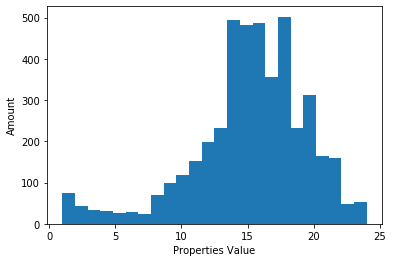

There are 53 which worth $1,000,000 or more
502


In [0]:
plt.hist(df['VAL'], bins=24)
plt.xlabel('Properties Value')
plt.ylabel('Amount')
plt.show()
print('There are',len(df[df.VAL == 24]),'which worth $1,000,000 or more')
print(len(df[df.VAL == 18]))

Text(0, 0.5, 'Amount')

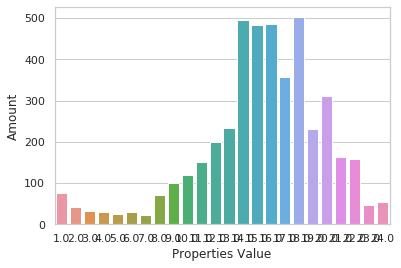

In [30]:
sns.set(style="whitegrid")
ax = sns.countplot(x="VAL", data=df)
plt.xlabel('Properties Value')
plt.ylabel('Amount')

**2. How many person recorded in a house on average**

In [0]:
avg_person = df['NP'].mean()
print(avg_person)

2.2984913793103448


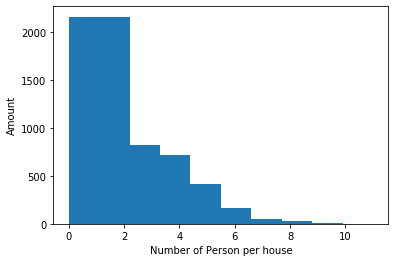

In [0]:
plt.hist(df['NP'], bins=10)
plt.xlabel('Number of Person per house')
plt.ylabel('Amount')
plt.show()

**3. Draw a graph to show the relationship between the property value and the number of persons recorded?**

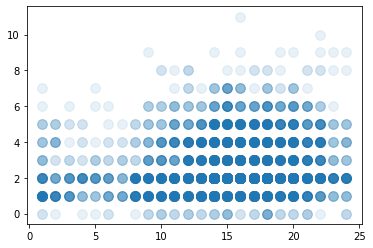

In [0]:
y = df['VAL']
x = df['NP']
area = np.pi*30
plt.scatter(y,x, s=area, alpha=0.1)
plt.show()


In [20]:
sns.set(style="ticks")
x = df['VAL'].gamma(2, size=1000).dropna()
y = df['NP'].gamma(2, size=1000).dropna()
sns.jointplot(x, y, kind="hex", color="#4CB391")

NameError: ignored

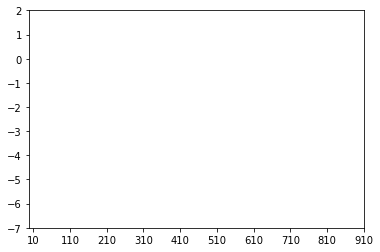

In [19]:
plt.axes()
circle=plt.Circle((1, 0), radius=1, fc='w')
plt.gca().add_patch(circle)
plt.xlim([-2, 2])
plt.ylim([-6, 2])
plt.yticks(np.arange(-7, 3, 1))
plt.xticks(np.arange(10, 1000, 100))
plt.show()

**4. Normalize family income into a range (0~1). Compare before vs after in histogram.**

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


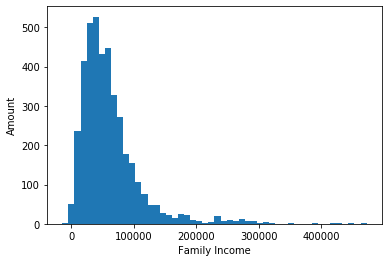

,0
count,4051.000000
mean,0.155290
std,0.099881
min,0.000000
25%,0.091803
50%,0.133496
75%,0.186484
max,1.000000


In [0]:
plt.hist(df['FINCP'], bins=50)
plt.xlabel('Family Income')
plt.ylabel('Amount')
plt.show()

x = df['FINCP'].values.reshape(-1,1) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized = pd.DataFrame(x_scaled)
normalized.describe()



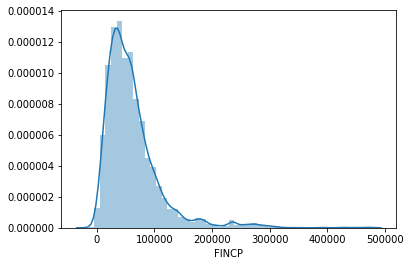

In [0]:
sns.distplot(df['FINCP'].dropna());

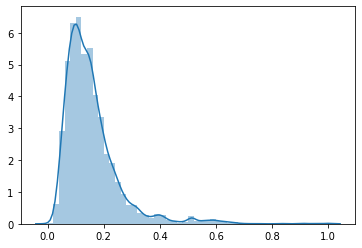

In [0]:
float_array = df['FINCP'].values.reshape(-1, 1).astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
df2 = pd.DataFrame(scaled_array)
sns.distplot(df2)



**5. Create 5 bins for family income.**

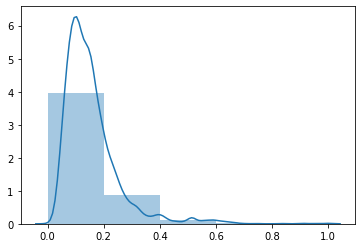

In [0]:
sns.distplot(df2, bins=5)